## 텐서플로 필사 스터디

- https://www.tensorflow.org/tutorials/quickstart/beginner
- https://www.tensorflow.org/tutorials/keras/classification

In [2]:
!pip install -q tensorflow-gpu==2.7.0-rc1

     |████████████████████████████████| 489.5 MB 29 kB/s 
     |████████████████████████████████| 463 kB 61.2 MB/s 
     |████████████████████████████████| 1.3 MB 56.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.7.0 which is incompatible.
tensorflow 2.9.2 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.7.0 which is incompatible.


In [3]:
import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [8]:
x_train, x_test = x_train/ 255.0 , x_test / 255.0

In [9]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                            tf.keras.layers.Dense(128, activation = "relu"),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(10, activation="softmax")
                            ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2920 - accuracy: 0.9128
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1407 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1061 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0865 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0755 - accuracy: 0.9763


In [14]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0748 - accuracy: 0.9768 - 504ms/epoch - 2ms/step


[0.07475747168064117, 0.9768000245094299]

In [15]:
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0-rc1


In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [21]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

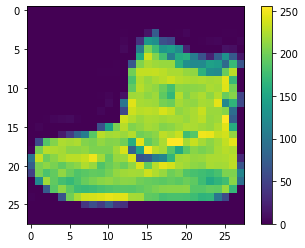

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
train_images = train_images / 255.0
test_images = test_images / 255.0

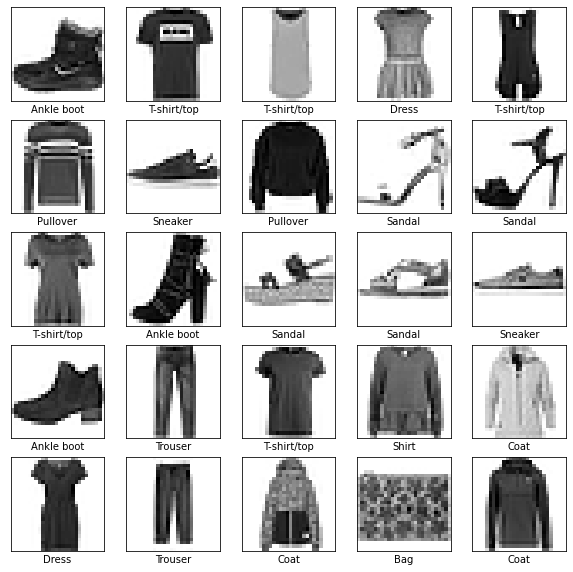

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [30]:
tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [31]:
model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [32]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.7459 - accuracy: 0.7533
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4553 - accuracy: 0.8356
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4043 - accuracy: 0.8536
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8622
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3564 - accuracy: 0.8694
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3407 - accuracy: 0.8739
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3286 - accuracy: 0.8792
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3175 - accuracy: 0.8820
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3090 - accuracy: 0.8857
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3032 - accurac

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy: ", test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 0s - loss: 0.3480 - accuracy: 0.8749 - 476ms/epoch - 2ms/step

Test accuracy:  0.8748999834060669


In [36]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [37]:
predictions = probability_model.predict(test_images)

In [38]:
predictions[0]

array([0.08558512, 0.08558512, 0.08558512, 0.08558512, 0.08558512,
       0.0860609 , 0.08558512, 0.08684719, 0.08558512, 0.22799611],
      dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

9

In [42]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img=true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

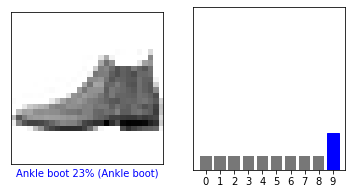

In [43]:
i = 0 
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

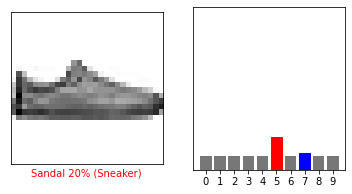

In [44]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

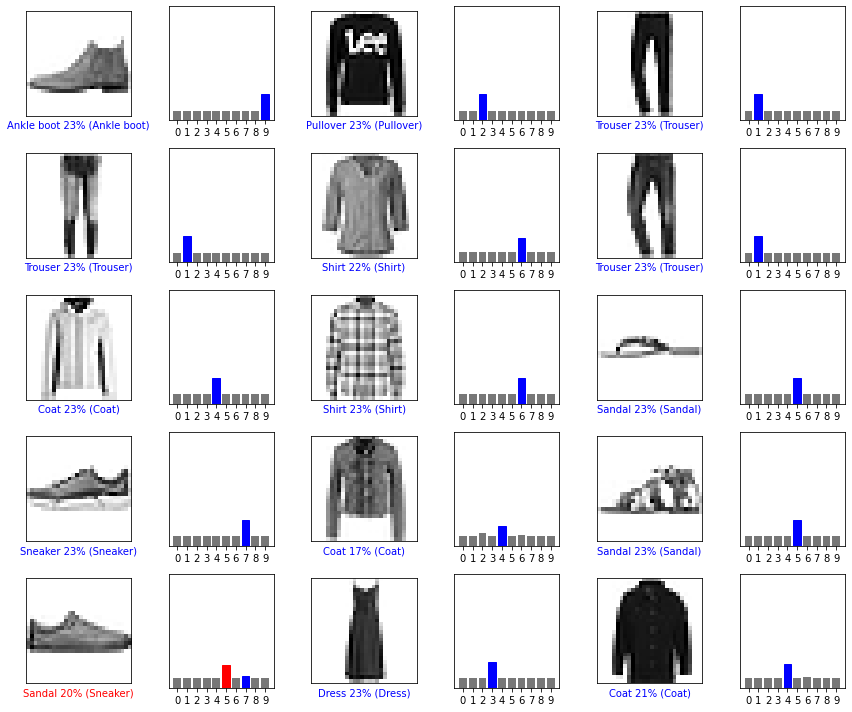

In [46]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [47]:
img = test_images[1]

print(img.shape)

(28, 28)


In [48]:
img = np.expand_dims(img, 0)

print(img.shape)

(1, 28, 28)


In [49]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.08540393 0.08540266 0.23092328 0.08540266 0.08547894 0.08540266
  0.08577789 0.08540266 0.08540266 0.08540266]]


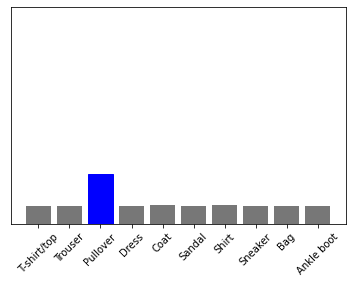

In [50]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [51]:
np.argmax(predictions_single[0])

2